In [ ]:
import yfinance
import numpy
import matplotlib
import pandas

In [ ]:
ticker_symbol = "GC=F"
ticker = yfinance.Ticker(ticker_symbol)
historical_data = ticker.history(period="10y")

In [ ]:
df=pandas.DataFrame()
df['Close']=historical_data['Close']

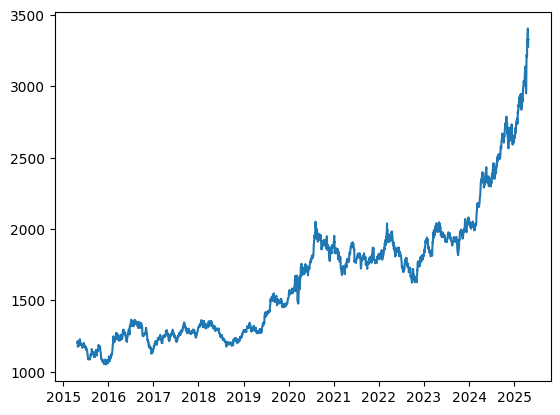

In [ ]:
matplotlib.pyplot.plot(df)

In [ ]:
df['RETURNS'] = numpy.log(df['Close']/df['Close'].shift(1))

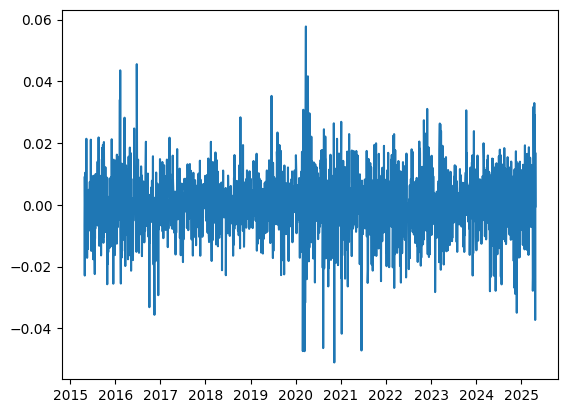

In [ ]:
matplotlib.pyplot.plot(df['RETURNS'])

<Axes: ylabel='Frequency'>

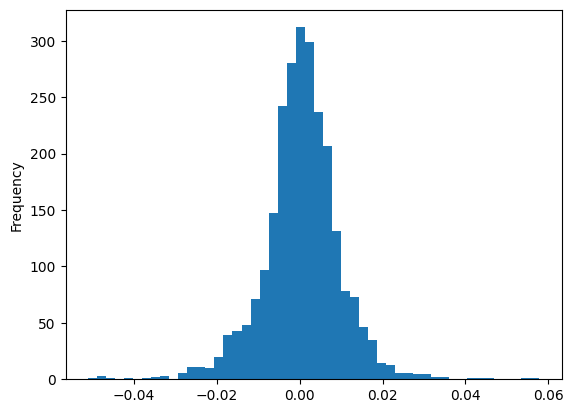

In [ ]:
df['RETURNS'].plot.hist(by=None, bins=50)

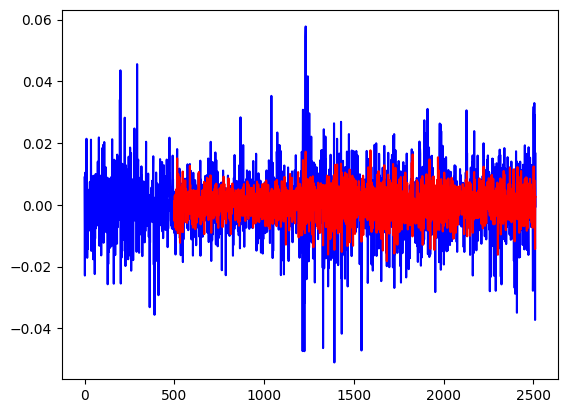

In [ ]:
P=500
df.dropna(inplace=True)

from statsmodels.tsa.ar_model import AutoReg
model = AutoReg(endog=df['RETURNS'].values, lags=P,seasonal=True,period=31).fit()
pred=model.predict()
matplotlib.pyplot.plot(df['RETURNS'].values,color='blue')
matplotlib.pyplot.plot(pred,color='red')